In [1]:
import sys
import matplotlib.pyplot as plt
import os

sys.path.append("../../")
from didgelab.analysis import *

In [2]:
!ls ../../../saved_evolutions/

2024-03-10T16-06-22_evolve         2024-05-29T11-33-34_evolve_arusha
2024-04-12T13-13-38_evolve_arusha  2024-05-30T19-05-32_evolve_arusha
2024-04-13T15-27-39_evolve_arusha  2024-06-01T11-22-19_evolve_arusha
2024-04-13T23-36-49_evolve_tamaki3 2024-06-01T15-19-01_evolve_arusha
2024-04-20T08-40-53_evolve_arusha  2024-06-02T11-31-02_evolve_arusha
2024-04-20T11-50-54_evolve_tamaki3 2024-06-03T09-37-44_evolve_arusha
2024-04-24T21-41-27_evolve_arusha


# Didgeridoo Analyse

ERROR:root:Compressed file ended before the end-of-stream marker was reached


************************
Individual 0
************************


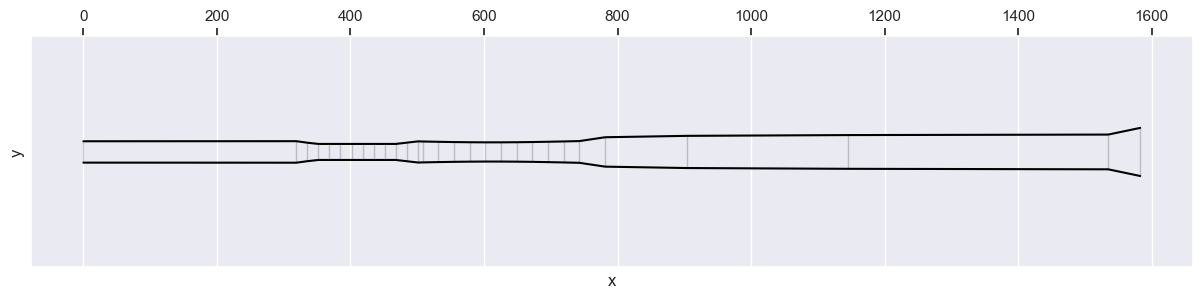

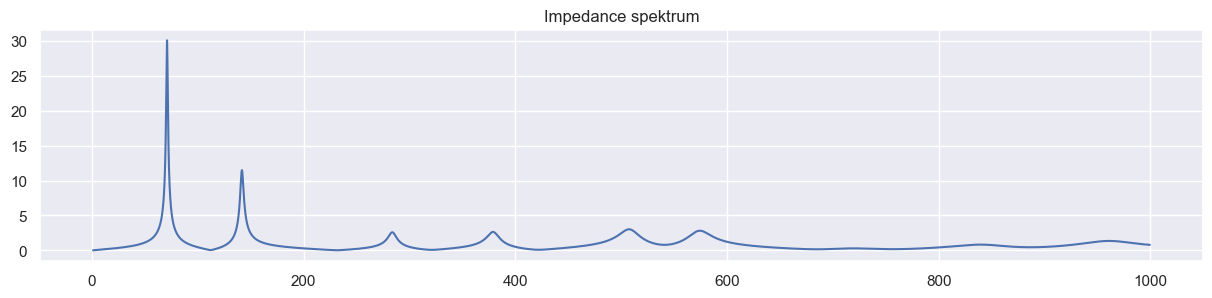

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1      -0.58      -31   70.89      30.07     1.00
1        D2      -2.58      -19  141.62      11.48     0.38
2        D3       0.42       -7  283.72       2.60     0.09
3        G3       1.42       -2  378.94       2.65     0.09
4        C4       6.42        3  507.29       3.03     0.10
5        D4      21.42        5  574.37       2.82     0.09
6       F#4      11.42        9  719.49       0.29     0.01
7        A5     -21.58       12  839.47       0.83     0.03
8        B5      12.42       14  960.96       1.36     0.05
Impedance sum: 55.12
Volume: 65.68 cm3
Length: 158.28 cm
Bell diameter: 7.20 cm

************************
Individual 1
************************


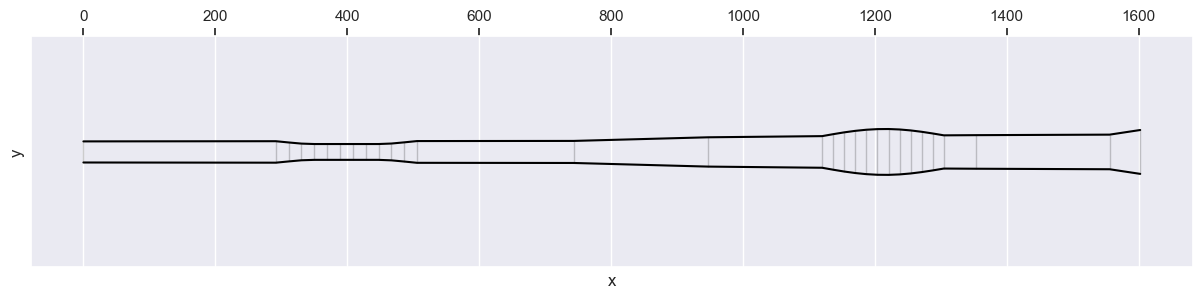

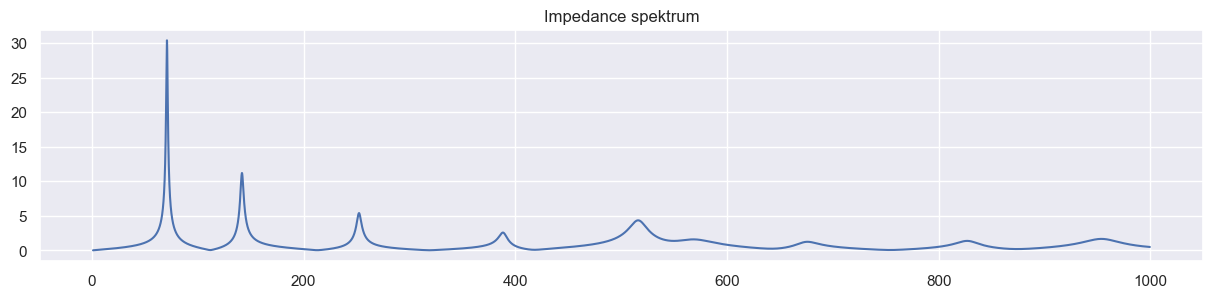

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1      -1.58      -31   70.85      30.41     1.00
1        D2      -1.58      -19  141.70      11.20     0.37
2        C3      -2.58       -9  252.33       5.40     0.18
3        G3      43.42       -2  388.25       2.58     0.08
4        C4      35.42        3  515.86       4.35     0.14
5        D4       2.42        5  568.10       1.60     0.05
6        F4       3.42        8  675.98       1.25     0.04
7        A5     -47.58       12  826.96       1.38     0.05
8        B5      -0.58       14  953.77       1.67     0.05
Impedance sum: 59.85
Volume: 68.03 cm3
Length: 160.24 cm
Bell diameter: 6.65 cm

************************
Individual 2
************************


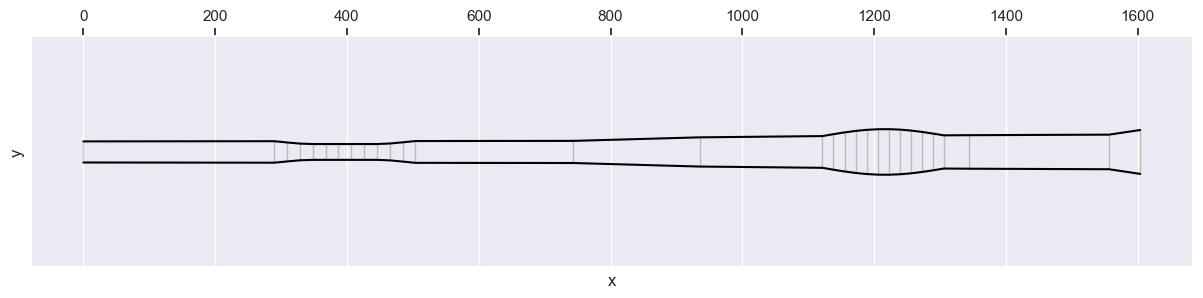

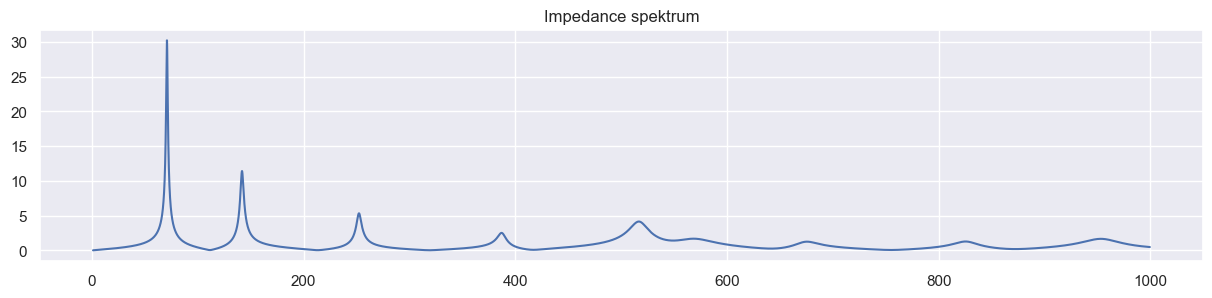

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1      -1.58      -31   70.85      30.23     1.00
1        D2      -0.58      -19  141.78      11.42     0.38
2        C3      -3.58       -9  252.18       5.34     0.18
3        G3      37.42       -2  386.90       2.52     0.08
4        C4      38.42        3  516.75       4.15     0.14
5        D4       3.42        5  568.43       1.69     0.06
6        F4       2.42        8  675.59       1.26     0.04
7       G#4      49.42       11  825.52       1.28     0.04
8        B5      -1.58       14  953.22       1.67     0.06
Impedance sum: 59.56
Volume: 68.20 cm3
Length: 160.37 cm
Bell diameter: 6.66 cm



In [3]:
folder = get_latest_evolution_folder()
folder = "../../../saved_evolutions/2024-06-03T09-37-44_evolve_arusha"
infile = os.path.join(folder, "population.json.gz")
population = get_latest_population(infile)
base_freq=425
visualize_individuals(population["population"], n=3, base_freq=base_freq)

# Evolution Analyse

ERROR:root:Compressed file ended before the end-of-stream marker was reached


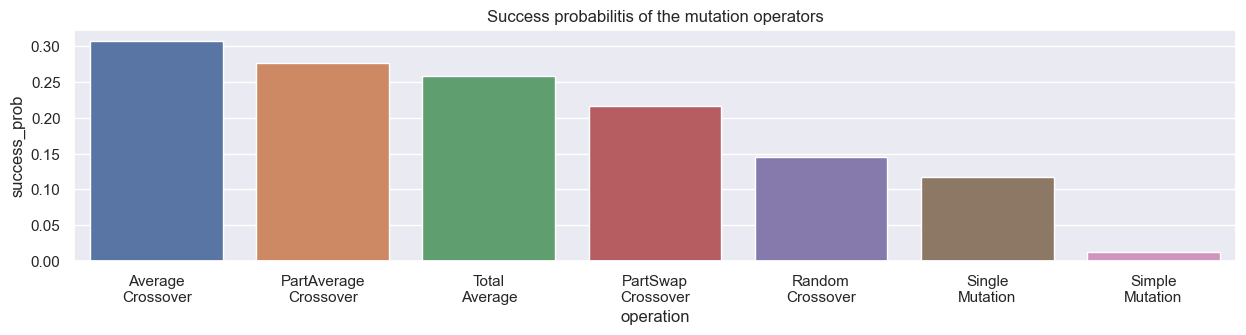

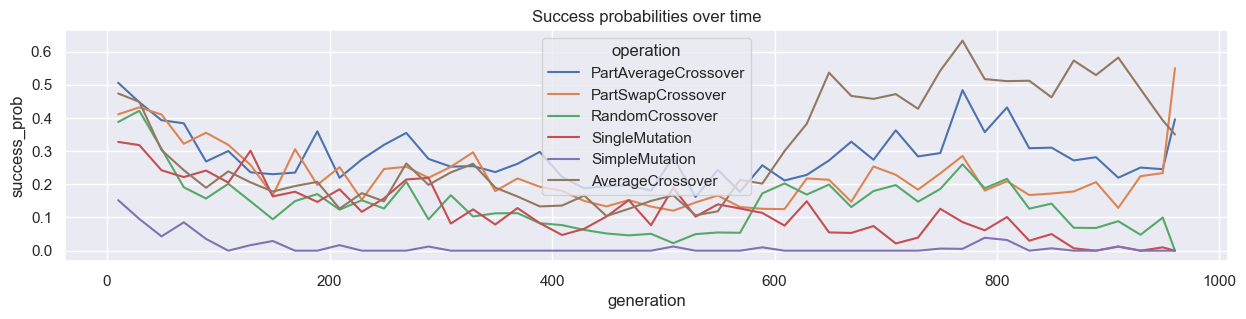

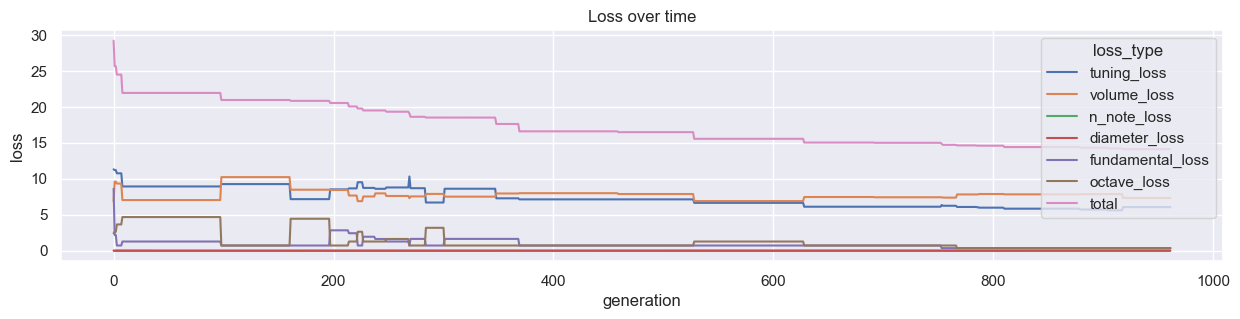

In [8]:


def get_deltas(infile=None, nodes=None):
    assert infile is not None or nodes is not None

    if infile is not None:
        nodes = build_graph(infile)
        
    deltas = []
    for edge in nodes.iterate_edges():
        for key in edge.parent.losses.keys():
            loss_delta = edge.parent.losses[key] - edge.child.losses[key]
            deltas.append([edge.name, key, np.max((0, loss_delta)), edge.child.losses[key], edge.child.generation])
    deltas = pd.DataFrame(deltas, columns=["operation", "loss_type", "delta", "loss_value", "generation"])
    return deltas


infile = os.path.join(folder, 'evolution_operations.jsonl.gz')
nodes = build_graph(infile)
deltas = get_deltas(nodes=nodes)
success_probs = get_success_probs(deltas)
sns.barplot(data=success_probs.query("loss_type=='total'"), x="operation", y="success_prob")
plt.title("Success probabilitis of the mutation operators")
plt.show()
plot_success_probs_over_time(deltas)
plt.show()
plot_loss_over_time(nodes)